#Projek Kelompok Statistika Inferensi C

---
Kelompok 4
Anggota:
1. Andriko Fajar Prakoso (195150200111073)
2. M. Nugraha Delta Revanza (195150201111047)
3. Anshar Fariz Zulhilmi (195150207111056)
4. Riza Setiawan Soetedjo (195150207111062)

# Import Library

Note: Setelah pip install Upgrade, lakukan restart runtime sehingga library versi terbaru bisa terpakai

In [ ]:
!pip install -U matplotlib
!pip install -U scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import math
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Dataset

Proses untuk memasukkan dataset [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) ke dalam GColab menggunakan API kemudian mengubahnya menjadi DataFrame menggunakan Pandas

In [ ]:
key = {"username":"rizastwn","key":"0327b40f2fdff1517d37c62424548c47"}
with open('kaggle.json', 'w') as json_file:
    json.dump(key, json_file)

In [ ]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip \*.zip  && rm *.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
rm: cannot remove '/root/.kaggle': No such file or directory
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.43MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
df = pd.read_csv('diabetes.csv')

# Deskripsi Data

**Data Dictionary**

| No. | Nama Fitur               | Tipe Data | Format Data                                           | Deskripsi Data                                                              | Contoh Data |
|-----|--------------------------|-----------|-------------------------------------------------------|-----------------------------------------------------------------------------|-------------|
| 1.  | Pregnancies              | int       | count                                                 | Jumlah banyak kali hamil                                                    | 6           |
| 2.  | Glucose                  | int       | mg/dL                                                 | Konsentrasi glukosa plasma selama 2 jam dalam tes toleransi glukosa oral | 148         |
| 3.  | BloodPressure            | int       | mm Hg                                                 | Tekanan darah diastolik                                                     | 72          |
| 4.  | SkinThickness            | int       | mm                                                    | Ketebalan lipatan kulit trisep                                              | 35          |
| 5.  | Insulin                  | int       | mu U/ml                                               | Insulin serum 2 jam                                                         | 94          |
| 6.  | BMI                      | float     | kg/m^2                                                | Indeks massa tubuh                                                          | 33.6        |
| 7.  | DiabetesPedigreeFunction | float     | score                                                 | Fungsi yang menilai kemungkinan diabetes berdasarkan riwayat keluarga       | 0.627       |
| 8.  | Age                      | int       | year                                                  | Umur                                                                        | 50          |
| 9.  | Outcome                  | int       | 0: Patient has no diabetes<br>1: Patient has diabetes | Variabel kelas yang menandakan diabetes atau tidak                          | 1           |

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Total baris & kolom
df.shape

(768, 9)

In [ ]:
# Tipe data dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64


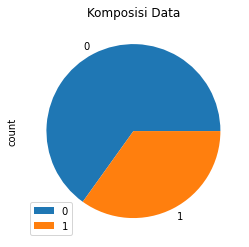

In [ ]:
#Komposisi data
print(df['Outcome'].value_counts())
df.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', title='Komposisi Data', ylabel='count')
plt.show()

In [ ]:
#Statistik data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Outliers dari masing-masing fitur
for i in df.columns[:-1]:
  arr = df[i].to_numpy()
  q1 = np.quantile(arr, 0.25)
  q3 = np.quantile(arr, 0.75)
  iqr = q3-q1
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  outliers = arr[(arr <= lower_bound) | (arr >= upper_bound)]
  print(f'{len(outliers)} Outliers for {i}: \n{outliers}\n')

4 Outliers for Pregnancies: 
[15 17 14 14]

5 Outliers for Glucose: 
[0 0 0 0 0]

45 Outliers for BloodPressure: 
[  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]

1 Outliers for SkinThickness: 
[99]

34 Outliers for Insulin: 
[543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]

19 Outliers for BMI: 
[ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]

29 Outliers for DiabetesPedigreeFunction: 
[2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]

9 Outliers for Age: 
[69 67 72 81 67 67 70 68 69]



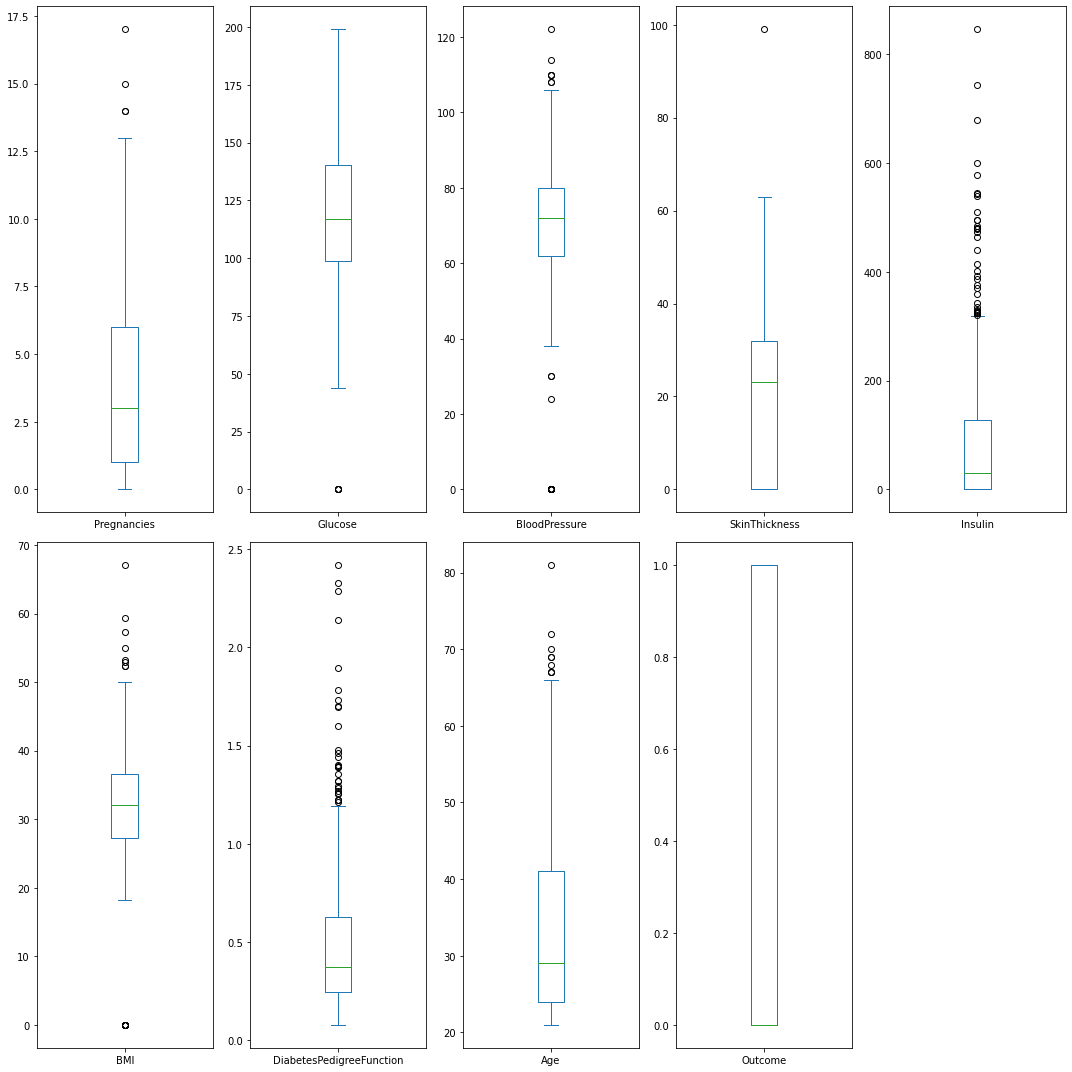

In [ ]:
#Grafik untuk outlier

df.plot(kind='box',figsize=(15,15),layout=(2,5),subplots=True)
plt.tight_layout()
plt.show()

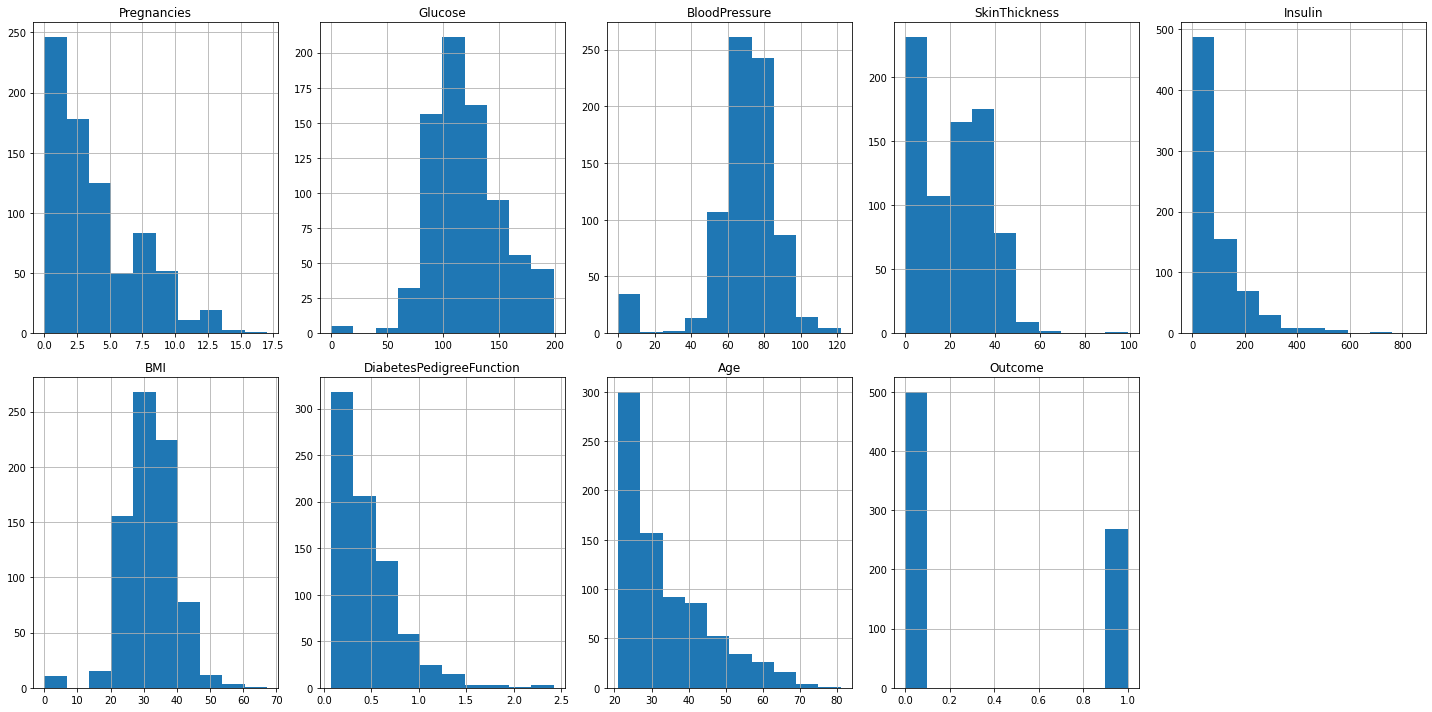

In [ ]:
#Histogram tiap fitur
df.hist(figsize=(20,10),layout=(2,5))
plt.tight_layout()
plt.show()

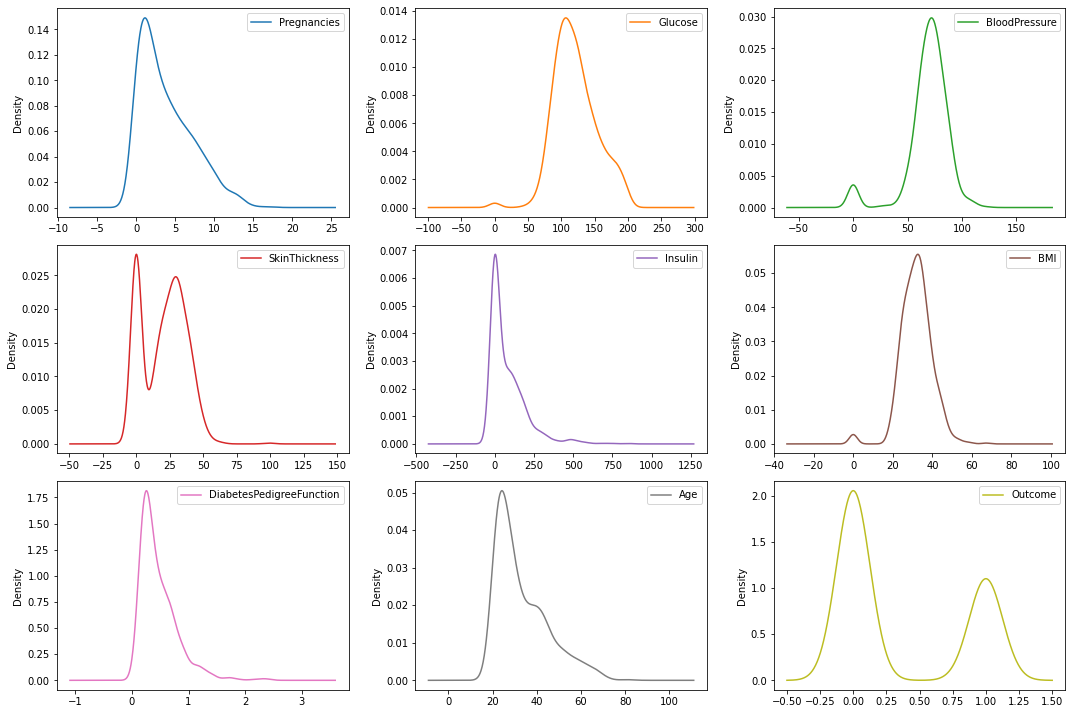

In [ ]:
#Kurva menggunakan Gaussian Kernel Density Estimation
df.plot(kind='kde',figsize=(15,10), layout=(3,3),subplots=True, sharex=False)
plt.tight_layout()
plt.show()

#After Preprocessing

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# df = df.fillna(df.median())
# df.head()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
df = pd.DataFrame(imp_mean.fit_transform(df),columns=df.columns)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [ ]:
df[[x for x in df.columns if x not in ['BMI','DiabetesPedigreeFunction']]] = df[[x for x in df.columns if x not in ['BMI','DiabetesPedigreeFunction']]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Komposisi data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.328125,28.746094,152.441406,32.441484,0.471876,33.240885,0.348958
std,3.369578,30.486778,12.150904,9.527254,97.392266,6.879519,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,-19.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,89.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Outliers from each feature
for i in df.columns[:-1]:
  arr = df[i].to_numpy()
  q1 = np.quantile(arr, 0.25)
  q3 = np.quantile(arr, 0.75)
  iqr = q3-q1
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  outliers = arr[(arr <= lower_bound) | (arr >= upper_bound)]
  print(f'{len(outliers)} Outliers for {i}: \n{outliers}\n')

4 Outliers for Pregnancies: 
[15 17 14 14]

0 Outliers for Glucose: 
[]

17 Outliers for BloodPressure: 
[ 40  30 110 108 122  30 110 104 108 104 110  24  38 106 106 106 114]

4 Outliers for SkinThickness: 
[60 56 63 99]

27 Outliers for Insulin: 
[543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 349 600 440 540 480 387 392 510]

8 Outliers for BMI: 
[53.2 55.  67.1 52.3 52.3 52.9 59.4 57.3]

29 Outliers for DiabetesPedigreeFunction: 
[2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]

9 Outliers for Age: 
[69 67 72 81 67 67 70 68 69]



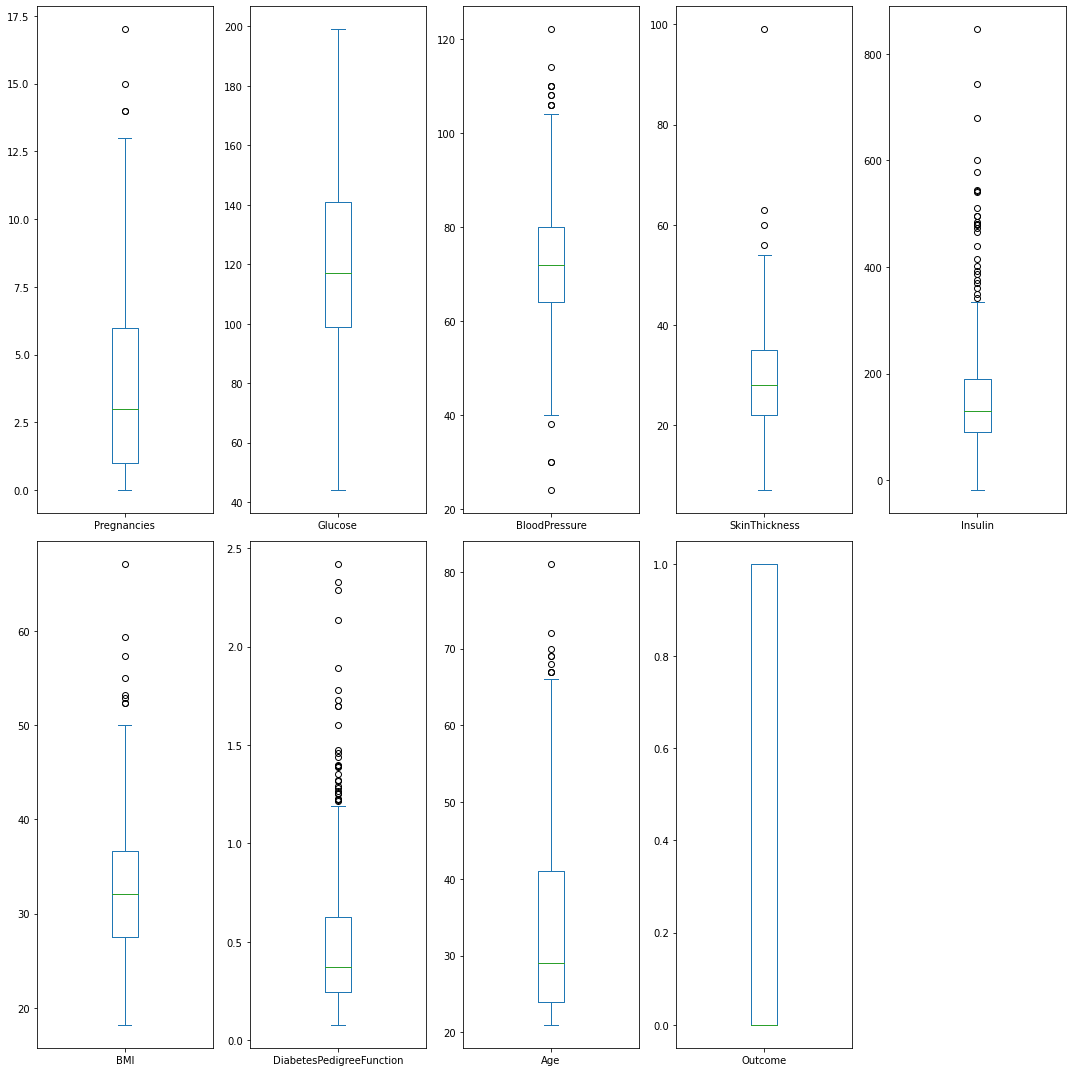

In [ ]:
df.plot(kind='box',figsize=(15,15),layout=(2,5),subplots=True)
plt.tight_layout()
plt.show()

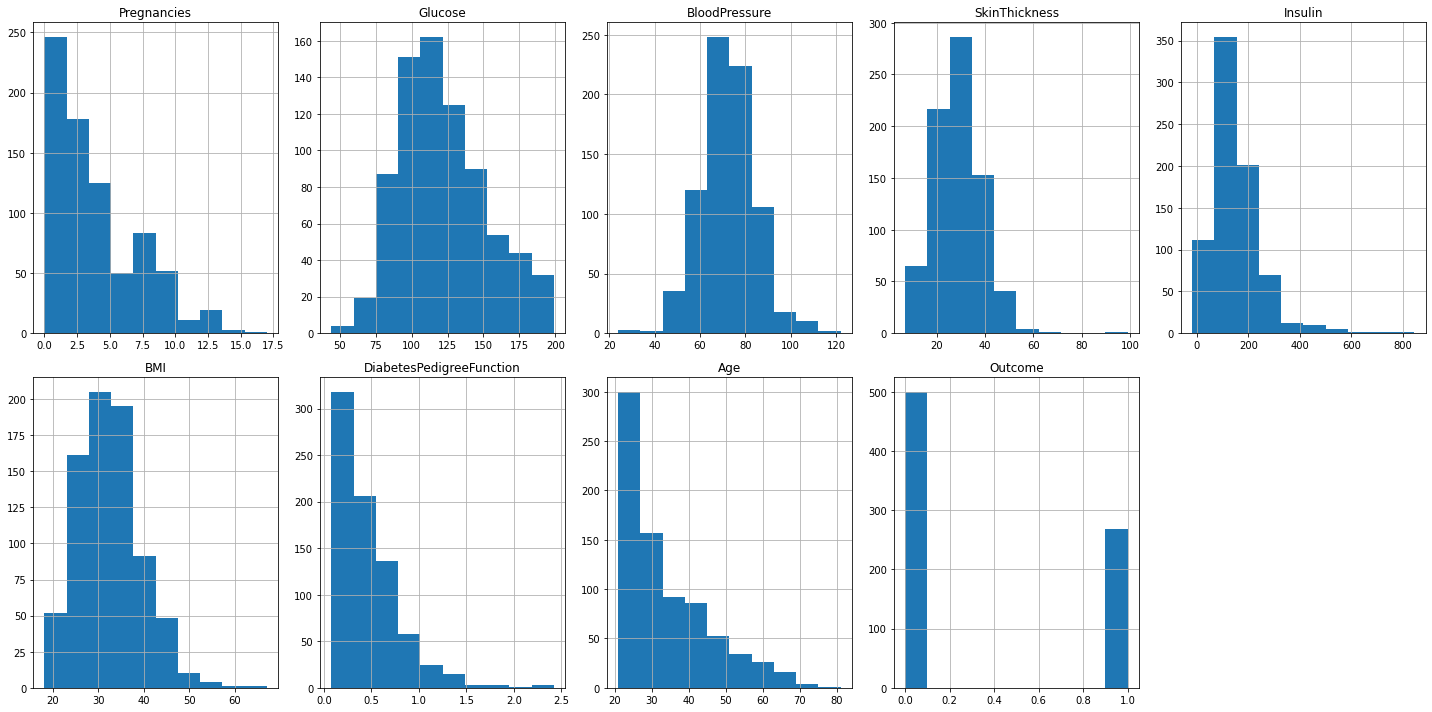

In [ ]:
#Histogram tiap fitur
df.hist(figsize=(20,10),layout=(2,5))
plt.tight_layout()
plt.show()

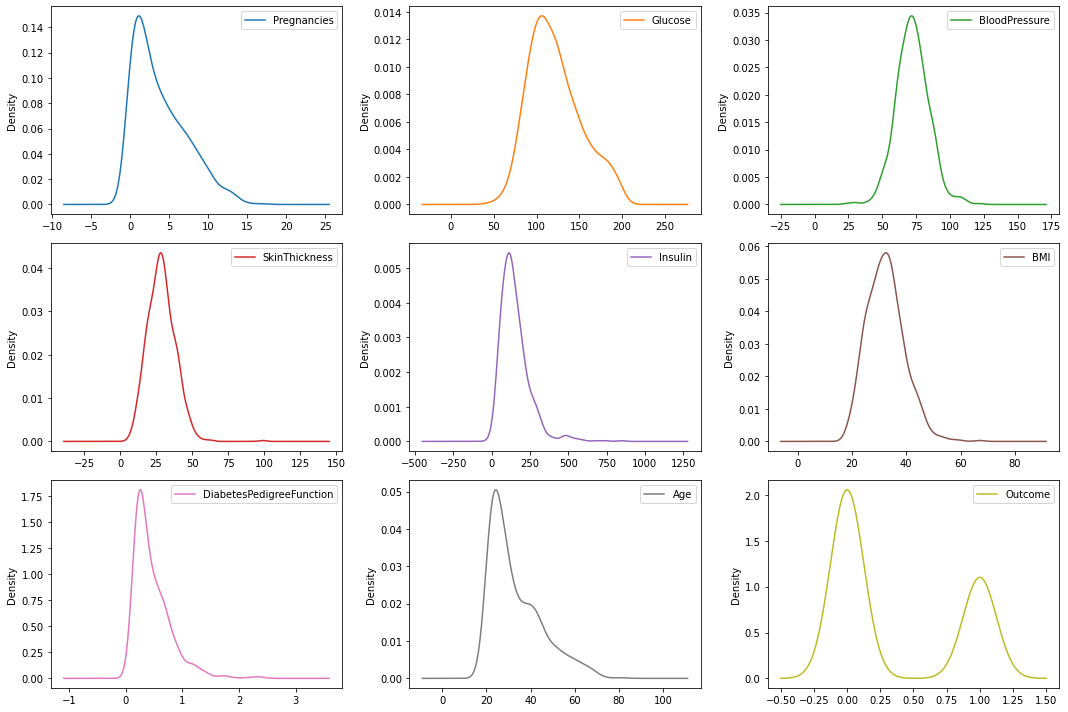

In [ ]:
#Kurva menggunakan Gaussian Kernel Density Estimation
df.plot(kind='kde',figsize=(15,10), layout=(3,3),subplots=True, sharex=False)
plt.tight_layout()
plt.show()

In [ ]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# fig = make_subplots(rows=2, cols=5, subplot_titles=df.columns)
# idx = 0
# for i in range(2):
#   for j in range(5):
#     if idx == len(df.columns):
#       break
#     fig.add_trace(
#         go.Box(
#             {'y': df[df.columns[idx]]}), row=i+1, col=j+1)
#     idx+=1
# fig.update_layout(height=900, width=900, title_text="Stacked Subplots")
# fig.show()

# Sampling

##Random Sampling

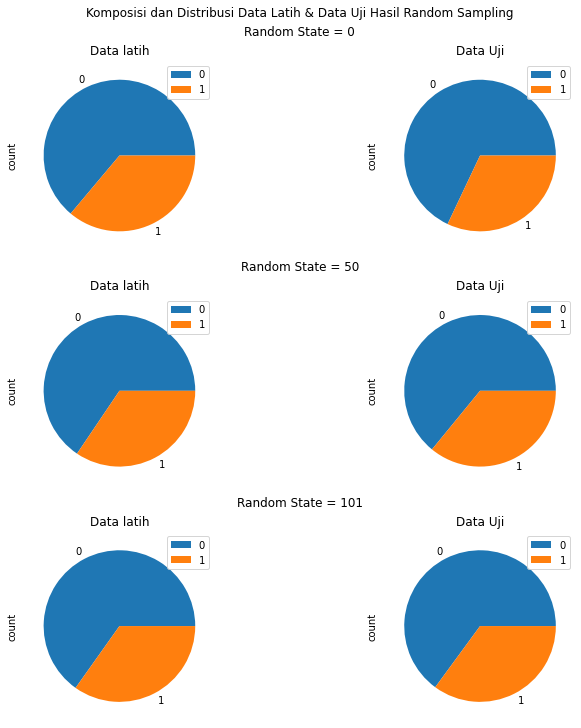

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))
fig.suptitle('Komposisi dan Distribusi Data Latih & Data Uji Hasil Random Sampling')
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):
  x = [0,50,101]
  subfig.suptitle(f'Random State = {x[row]}')
  axs = subfig.subplots(nrows=1, ncols=2)
  df_latih1,df_uji1 = train_test_split(df, test_size = 0.3,random_state = x[row])
  df_latih1.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', ax = axs[0],title='Data latih', ylabel='count')
  df_uji1.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', ax = axs[1],title='Data Uji', ylabel='count')
  
plt.show()

## Proportionate Stratified Random Sampling

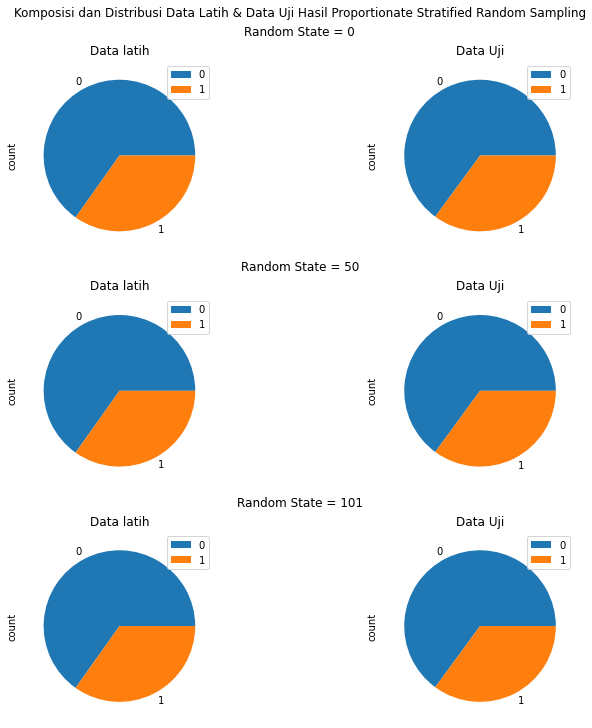

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))
fig.suptitle('Komposisi dan Distribusi Data Latih & Data Uji Hasil Proportionate Stratified Random Sampling')
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):
  x = [0,50,101]
  subfig.suptitle(f'Random State = {x[row]}')
  axs = subfig.subplots(nrows=1, ncols=2)
  df_latih2,df_uji2 = train_test_split(df, test_size = 0.3,random_state = x[row], stratify = df['Outcome'])
  df_latih2.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', ax = axs[0],title='Data latih', ylabel='count')
  df_uji2.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', ax = axs[1],title='Data Uji', ylabel='count')
  
plt.show()

##Sistematic Sampling

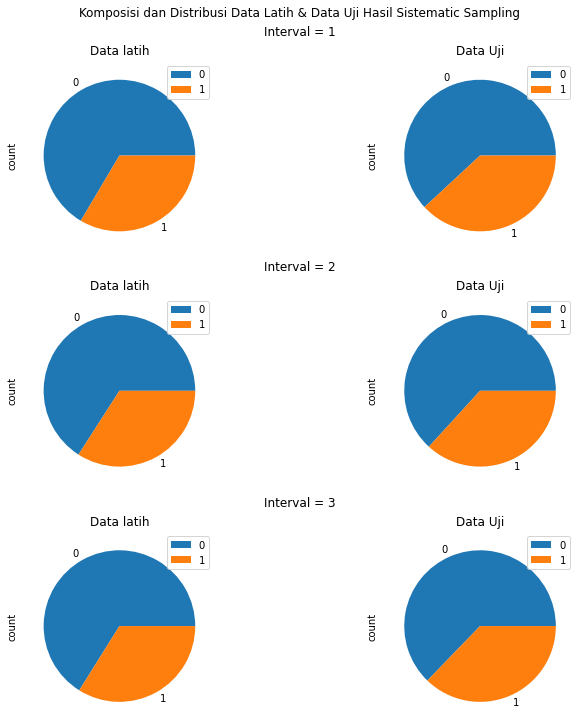

In [ ]:
def sis_sampling(data,interval,test_size):
  size = int(math.ceil(data.shape[0]*test_size))
  test = data.iloc[lambda x: x.index % interval == 0].head(size)
  train = data.drop(index =test.index)
  return train,test

fig = plt.figure(constrained_layout=True, figsize=(10,10))
fig.suptitle('Komposisi dan Distribusi Data Latih & Data Uji Hasil Sistematic Sampling')
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):
  x = [1,2,3]
  subfig.suptitle(f'Interval = {x[row]}')
  axs = subfig.subplots(nrows=1, ncols=2)
  df_latih3,df_uji3 = sis_sampling(df,x[row],0.3)
  df_latih3.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', ax = axs[0],title='Data latih', ylabel='count')
  df_uji3.groupby('Outcome').count().plot(kind = 'pie', y = 'Age', ax = axs[1],title='Data Uji', ylabel='count')
  
plt.show()

In [ ]:
df_uji3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,218,33.600000,0.627,50,1
3,1,89,66,23,94,28.100000,0.167,21,0
6,3,78,50,32,88,31.000000,0.248,26,1
9,8,125,96,34,161,35.832462,0.232,54,1
12,10,139,80,26,184,27.100000,1.441,57,0


# Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import classification_report

In [ ]:
def run_svm(x_train,y_train,x_test,y_test):
  model_SVC = SVC()
  grid_SVC = {'C': [0.1, 1, 10],
          'kernel' : ["rbf"],
          'gamma' : [1,'scale', 'auto'],
          'random_state':[1,51,101]}
  clf_SVC = GridSearchCV(model_SVC, grid_SVC, cv=10,scoring='accuracy')
  clf_SVC.fit(x_train,y_train)

  print("Best Parameter & Score:")
  print(clf_SVC.best_params_)
  print(clf_SVC.best_score_,'\n')

  model_SVC = SVC(gamma=clf_SVC.best_params_['gamma'], 
                C=clf_SVC.best_params_['C'], 
                kernel=clf_SVC.best_params_['kernel'],
                random_state = clf_SVC.best_params_['random_state'])
  model_SVC.fit(x_train,y_train)
  predictions_SVC = model_SVC.predict(x_test)

  print("SVM Model Parameter:")
  print(json.dumps(model_SVC.get_params(), indent=2),'\n')

  print('Classification Report:')
  print(classification_report(label_uji1, predictions_SVC))

In [ ]:
#@title
# def run_knn(x_train,y_train,x_test,y_test):
#   model_KNN = KNeighborsClassifier()
#   grid_KNN = {'n_neighbors':[3,5,10],
#               'weights':('uniform','distance'),
#               'algorithm':('ball_tree','kd_tree','brute')}
#   clf_KNN = GridSearchCV(model_KNN, grid_KNN, cv=10,scoring='accuracy')
#   clf_KNN.fit(x_train,y_train)

#   print("Best Parameter & Score:")
#   print(clf_KNN.best_params_)
#   print(clf_KNN.best_score_,'\n')

#   model_KNN = KNeighborsClassifier(n_neighbors=clf_KNN.best_params_['n_neighbors'], 
#                 weights=clf_KNN.best_params_['weights'], 
#                 algorithm=clf_KNN.best_params_['algorithm'])
#   model_KNN.fit(x_train,y_train)
#   predictions_KNN = model_KNN.predict(x_test)

#   print("KNN Model Parameter:")
#   print(json.dumps(model_KNN.get_params(), indent=2),'\n')

#   print('Classification Report:')
#   print(classification_report(label_uji1, predictions_KNN))

##Random Sampling

In [ ]:
label_latih1 = df_latih1.pop('Outcome')
df_latih1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,5,126,78,27,22,29.6,0.439,40
58,0,146,82,37,221,40.5,1.781,44
216,5,109,62,41,129,35.8,0.514,25
168,4,110,66,27,127,31.9,0.471,29
658,11,127,106,36,162,39.0,0.190,51


In [ ]:
label_uji1 = df_uji1.pop('Outcome')
df_uji1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,27,173,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,97,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25


In [ ]:
run_svm(df_latih1,label_latih1,df_uji1,label_uji1)

Best Parameter & Score:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}
0.7523759608665268 

SVM Model Parameter:
{
  "C": 10,
  "break_ties": false,
  "cache_size": 200,
  "class_weight": null,
  "coef0": 0.0,
  "decision_function_shape": "ovr",
  "degree": 3,
  "gamma": "scale",
  "kernel": "rbf",
  "max_iter": -1,
  "probability": false,
  "random_state": 1,
  "shrinking": true,
  "tol": 0.001,
  "verbose": false
} 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       150
           1       0.74      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



## Proportionate Stratified Random Sampling

In [ ]:
label_latih2 = df_latih2.pop('Outcome')
df_latih2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
126,3,120,70,30,135,42.9,0.452,30
618,9,112,82,24,124,28.2,1.282,50
475,0,137,84,27,187,27.3,0.231,59
198,4,109,64,44,99,34.8,0.905,26
505,10,75,82,29,47,33.3,0.263,38


In [ ]:
label_uji2 = df_uji2.pop('Outcome')
df_uji2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
724,1,111,94,29,127,32.80000,0.265,45
128,1,117,88,24,145,34.50000,0.403,40
351,4,137,84,27,175,31.20000,0.252,30
684,5,136,82,30,193,30.89064,0.640,69
704,4,110,76,20,100,28.40000,0.118,27


In [ ]:
run_svm(df_latih2,label_latih2,df_uji2,label_uji2)

Best Parameter & Score:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}
0.7616701607267644 

SVM Model Parameter:
{
  "C": 10,
  "break_ties": false,
  "cache_size": 200,
  "class_weight": null,
  "coef0": 0.0,
  "decision_function_shape": "ovr",
  "degree": 3,
  "gamma": "scale",
  "kernel": "rbf",
  "max_iter": -1,
  "probability": false,
  "random_state": 1,
  "shrinking": true,
  "tol": 0.001,
  "verbose": false
} 

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71       150
           1       0.39      0.28      0.33        81

    accuracy                           0.59       231
   macro avg       0.53      0.52      0.52       231
weighted avg       0.57      0.59      0.58       231



##Sistematic Sampling

In [ ]:
label_latih3 = df_latih3.pop('Outcome')
df_latih3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,70,26.6,0.351,31
2,8,183,64,21,268,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,22,125,25.6,0.201,30
7,10,115,72,31,136,35.3,0.134,29


In [ ]:
label_uji3 = df_uji3.pop('Outcome')
df_uji2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
724,1,111,94,29,127,32.80000,0.265,45
128,1,117,88,24,145,34.50000,0.403,40
351,4,137,84,27,175,31.20000,0.252,30
684,5,136,82,30,193,30.89064,0.640,69
704,4,110,76,20,100,28.40000,0.118,27


In [ ]:
run_svm(df_latih3,label_latih3,df_uji3,label_uji3)

Best Parameter & Score:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}
0.7636967155835082 

SVM Model Parameter:
{
  "C": 10,
  "break_ties": false,
  "cache_size": 200,
  "class_weight": null,
  "coef0": 0.0,
  "decision_function_shape": "ovr",
  "degree": 3,
  "gamma": "scale",
  "kernel": "rbf",
  "max_iter": -1,
  "probability": false,
  "random_state": 1,
  "shrinking": true,
  "tol": 0.001,
  "verbose": false
} 

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.69       150
           1       0.33      0.25      0.28        81

    accuracy                           0.56       231
   macro avg       0.49      0.49      0.48       231
weighted avg       0.53      0.56      0.54       231



#ANOVA

In [ ]:
from scipy.stats import kruskal
from scipy.stats import ttest_ind
# from scipy.stats import tukey_hsd
for x in df.columns[:-1]:
  print(x)
  cat_0 = df.loc[df['Outcome']==0,x]
  cat_1 = df.loc[df['Outcome']==1,x] 
  print(cat_0.shape,cat_1.shape)
  print(">Kruskal Wallis H-test")
  print(f"H0: {x} tidak mempengaruhi kemungkinan terkena diabetes")
  print(f"H1: {x} mempengaruhi kemungkinan terkena diabetes")
  res = kruskal(cat_0,cat_1,nan_policy='omit')
  stat,pval = res.statistic,res.pvalue
  print("Nilai F:",stat)
  print("Nilai P-value:",pval)
  if pval < 0.05:
    print("H0 ditolak dan H1 diterima")
    # print("\n>Unequal Variance T-test")
    # res = ttest_ind(cat_0,cat_1,equal_var=False)
    # score,pval = res.statistic,res.pvalue
    # print("Nilai T-value:",score)
    # print("Nilai P-value:",pval)
  else:
    print("H0 diterima dan H1 ditolak")
  print()

Pregnancies
(500,) (268,)
>Kruskal Wallis H-test
H0: Pregnancies tidak mempengaruhi kemungkinan terkena diabetes
H1: Pregnancies mempengaruhi kemungkinan terkena diabetes
Nilai F: 30.279026997235565
Nilai P-value: 3.7414975961260366e-08
H0 ditolak dan H1 diterima

Glucose
(500,) (268,)
>Kruskal Wallis H-test
H0: Glucose tidak mempengaruhi kemungkinan terkena diabetes
H1: Glucose mempengaruhi kemungkinan terkena diabetes
Nilai F: 181.08795506854977
Nilai P-value: 2.8046550605705234e-41
H0 ditolak dan H1 diterima

BloodPressure
(500,) (268,)
>Kruskal Wallis H-test
H0: BloodPressure tidak mempengaruhi kemungkinan terkena diabetes
H1: BloodPressure mempengaruhi kemungkinan terkena diabetes
Nilai F: 25.925784076685865
Nilai P-value: 3.547983155409434e-07
H0 ditolak dan H1 diterima

SkinThickness
(500,) (268,)
>Kruskal Wallis H-test
H0: SkinThickness tidak mempengaruhi kemungkinan terkena diabetes
H1: SkinThickness mempengaruhi kemungkinan terkena diabetes
Nilai F: 64.16377157139718
Nilai P-